In [37]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [41]:
"""
#get the training data
original_training=pd.read_csv(".\\ADvsHCFourier.csv")
original_training.head(10)
train_images=original_training.copy()

del train_images['class']
del train_images['experiment']
train_images.head()

train_labels = []

for data in original_training ['class']:
    train_labels.append(data)
    
print(train_labels)

"""

[' Control', ' Control', ' Control', ' Control', ' Control', ' AD', ' Control', ' AD', ' AD', ' AD', ' AD', ' AD', ' Control', ' AD', ' AD', ' AD', ' AD', ' AD', ' AD', ' AD', ' Control', ' AD', ' AD', ' AD', ' AD', ' AD', ' Control', ' AD', ' AD', ' AD', ' AD', ' AD', ' Control', ' AD', ' AD', ' AD', ' AD', ' Control', ' AD', ' AD', ' AD', ' AD', ' AD', ' AD', ' AD', ' AD', ' AD', ' Control', ' AD', ' AD', ' AD', ' AD', ' AD', ' AD', ' Control', ' AD', ' AD', ' AD', ' AD', ' AD', ' AD']


In [44]:
"""#get the test data
test_data= pd.read_csv(".\\ADvsHCFourier_test.csv")
test_images=test_data.copy()
del test_images['class']
del test_images['experiment']
test_images.head(8)
test_labels=[]
for t_data in test_data ['class']:
    test_labels.append(t_data)
print('actual test data sets labels')    
print(test_labels)
"""


actual test data sets labels
[' Control', ' Control', ' Control', ' Control', ' Control', ' Control', ' Control', ' Control', ' Control', ' Control', ' AD']


## getting the data

In [66]:
fashion_mnist = keras.datasets.fashion_mnist

#these variables are refs to four numpy arrays of data and labels for training and testing our model
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## explore what the these numpy arrays are

In [67]:
print("dimensions of the training dataset :",train_images.shape)



dimensions of the training dataset : (60000, 28, 28)


In [68]:
print("count of respective training_labels :",len(train_labels))


count of respective training_labels : 60000


In [69]:
print("train labels are :",train_labels)

train labels are : [9 0 0 ..., 3 0 5]


In [70]:
print("dimensions of the test dataset :",test_images.shape)

dimensions of the test dataset : (10000, 28, 28)


In [71]:
print("count of respective testing_labels :",len(test_labels))

count of respective testing_labels : 10000


## preprocessing the data

In [72]:
train_images = train_images / 255.0

test_images = test_images / 255.0

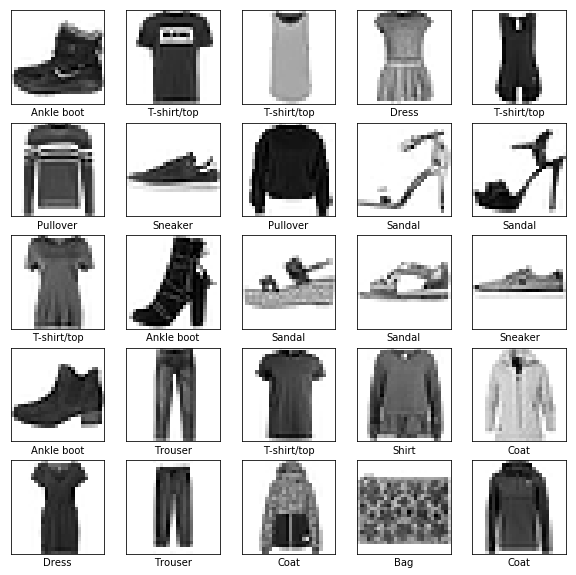

In [73]:
#Display the first 25 images from the training set and display the class name below each image.
#Verify that the data is in the correct format and we're ready to build and train the network.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## build the model

In [77]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
print("The first layer in this network, tf.keras.layers.Flatten", 
      "transforms the format of the images from a 2d-array (of 28 by 28 pixels)", 
      "to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of",
      "pixels in the image and lining them up. This layer has no parameters to learn", 
      "it only reformats the data.After the pixels are flattened, the network consists of a",
      "sequence of two tf.keras.layers.Dense layers. These are densely-connected, or fully-connected", 
      "neural layers. The first Dense layer has 128 nodes, or neurons. The second (and last) layer is",
      "a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1.",
      "Each node contains a score that indicates the probability that the current image belongs" ,
      "to one of the 10 digit classes.")

The first layer in this network, tf.keras.layers.Flatten transforms the format of the images from a 2d-array (of 28 by 28 pixels) to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn it only reformats the data.After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely-connected, or fully-connected neural layers. The first Dense layer has 128 nodes, or neurons. The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 digit classes.


## compile the model

In [78]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#Loss function —This measures how accurate the model is during training.
#               We want to minimize this function to "steer" the model in the right direction.

#Optimizer —This is how the model is updated based on the data it sees and its loss function.

#Metrics —Used to monitor the training and testing steps. The following example uses accuracy,
#         the fraction of the images that are correctly classified.

## train the model

In [79]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 14s 229us/step - loss: 0.4961 - acc: 0.8254
Epoch 2/5
60000/60000 [==============================] - 9s 148us/step - loss: 0.3782 - acc: 0.8638
Epoch 3/5
60000/60000 [==============================] - 7s 125us/step - loss: 0.3382 - acc: 0.8771
Epoch 4/5
60000/60000 [==============================] - 8s 134us/step - loss: 0.3132 - acc: 0.8851
Epoch 5/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.2969 - acc: 0.8907


## evaluate accuracy

In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc*100,"%")

10000/10000 [==============================] - 1s 81us/step
Test accuracy: 87.07 %


## make predictions on batches

In [35]:
predictions = model.predict(test_images)
#here is the first prediction
predictions[0]
print("predicted first label :",np.argmax(predictions[0]))
print("actual first label :",test_labels[0])


predicted first label : 9
actual first label : 9


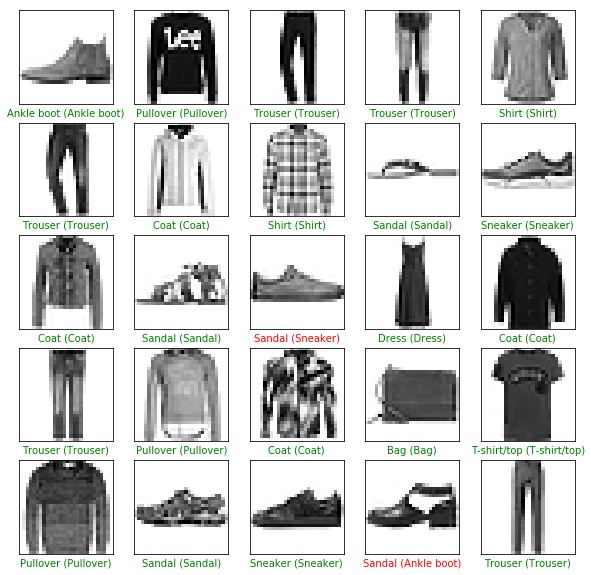

In [36]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)
      

## how to predict a single image

In [ ]:
#img = test_images[0]
#img = (np.expand_dims(img,0))
#predictions = model.predict(img)

#prediction = predictions[0]

#np.argmax(prediction)